In [98]:
import pandas as pd
import numpy as np
import seaborn as sns

In [99]:
data = pd.read_parquet("./data/crypto_6h_10y.parquet")
data.shape

(51857, 7)

In [100]:
data["ticker"].value_counts()

ticker
BTC-USD     14599
ETH-USD     14063
LINK-USD     9533
ADA-USD      7013
SOL-USD      6649
Name: count, dtype: int64

In [101]:
data["timestamp"] = pd.to_datetime(data["time"])
data["date"] = data["timestamp"].dt.date

data = data.sort_values(['ticker', 'timestamp']).reset_index(drop=True)

data['log_close'] = np.log(data['close'])

# per-ticker next-period log-return
data['target'] = data.groupby('ticker')['log_close'].shift(-1) - data['log_close']

data.drop(columns=['log_close'], inplace=True)

In [102]:
data

,ticker,time,low,high,open,close,volume,timestamp,date,target
0,ADA-USD,2021-03-18 12:00:00,1.2390,1.8800,1.6551,1.2902,7.748862e+07,2021-03-18 12:00:00,2021-03-18,-0.047783
1,ADA-USD,2021-03-18 18:00:00,1.2155,1.3180,1.2902,1.2300,3.489625e+07,2021-03-18 18:00:00,2021-03-18,0.027663
2,ADA-USD,2021-03-19 00:00:00,1.1808,1.2645,1.2311,1.2645,2.037058e+07,2021-03-19 00:00:00,2021-03-19,-0.003803
3,ADA-USD,2021-03-19 06:00:00,1.2348,1.2892,1.2645,1.2597,8.217223e+06,2021-03-19 06:00:00,2021-03-19,0.006331
4,ADA-USD,2021-03-19 12:00:00,1.2515,1.3010,1.2600,1.2677,1.323804e+07,2021-03-19 12:00:00,2021-03-19,0.030989
...,...,...,...,...,...,...,...,...,...,...
51852,SOL-USD,2026-01-03 12:00:00,130.4300,132.1200,130.6400,131.8200,1.201935e+05,2026-01-03 12:00:00,2026-01-03,0.011315
51853,SOL-USD,2026-01-03 18:00:00,131.2800,133.9200,131.8600,133.3200,1.471915e+05,2026-01-03 18:00:00,2026-01-03,0.009035
51854,SOL-USD,2026-01-04 00:00:00,133.2700,134.8900,133.3200,134.5300,2.304874e+05,2026-01-04 00:00:00,2026-01-04,-0.001488
51855,SOL-USD,2026-01-04 06:00:00,133.1700,134.9500,134.5200,134.3300,1.459263e+05,2026-01-04 06:00:00,2026-01-04,0.001785


In [103]:
data["target"].describe()

count    51852.000000
mean         0.000241
std          0.023760
min         -0.313528
25%         -0.009004
50%          0.000274
75%          0.009778
max          0.442447
Name: target, dtype: float64

<Axes: xlabel='target', ylabel='Count'>

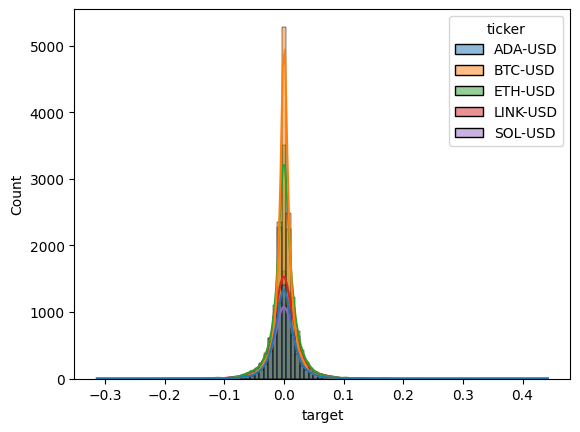

In [105]:
sns.histplot(data=data, x="target", bins=100, kde=True, hue="ticker")

In [106]:
data.isna().sum()

ticker       0
time         0
low          0
high         0
open         0
close        0
volume       0
timestamp    0
date         0
target       5
dtype: int64

In [108]:
data.dropna(inplace=True)

In [109]:
data.to_csv("historical_crypto_returns.csv", index=False)